# Milestone 1
Nama: Samuel Tatang Surja <br>
Batch: HCK-012 <br>

Link to [Tableau](https://public.tableau.com/views/Milestone1_Sammy/Visual?:language=en-US&:display_count=n&:origin=viz_share_link)

## Case / Objective
Keponakan saya (Matt) bercita-cita menjadi e-sport player <b>League of Legends</b> (LoL) profesional, karena itu kakak saya sebagai orang tua ingin mendukungnya dan meminta bantuan saya untuk menganalisa bagaimana cara bermain pemain profesional supaya bisa ditiru oleh Matt. <br>
Sebagai informasi tambahan, role favorit Matt adalah AD Carry (ADC). <br>
Dengan bekal kemampuan menganalisa data yang saya pelajari di Hacktiv8, saya akan membantu Matt mengejar cita-citanya.

## Problem Statement: SMART

- Specific: Meningkatkan skill bermain League of Legends Matt.
- Measurable: Dia memenangkan 1 dari 5 match yang dimainkan (win rate 20%)
- Achievable: Dengan menganalisa data game profesional saya bisa menemukan pattern early game priority (5 event pertama) dengan kemungkinan menang paling tinggi. 
- Relevant: Karena League of Legends adalah game MOBA (Multiplayer Online Battle Arena), maka setiap game dimulai dengan kondisi yang sama dan keputusan/langkah yang diambil di awal game dapat menentukan hasil akhir dari game tersebut.
- Time-Bound: Perkembangan skill dapat dilihat setelah 1 bulan latihan (30+ games)
<br><br>

Summary: Meningkatkan skill LoL Matt hingga mencapai win rate 20% dari 30 game dengan cara menganalisa game profesional dan menemukan pattern early game priority yang potensi menangnya paling tinggi kemudian meniru/menerapkan strategi early game tersebut ketika bermain.

## Problem Statement: 5W+1H
- Bagaimana central tendencies win rate pemain ADC profesional ? 
- Apakah ada korelasi antara mendapatkan first blood dengan memenangkan game ?
- Seberapa signifikan dragon dan tower bot sebagai objective dibandingkan objectives lain ?
- Berapa frekuensi terjadinya first blood, dragon dan tower bot di setiap event ?
- Bagaimana perbandingan kemenangan tim BLUE dan tim RED ?
- Bagaimana ke hubungan antara gp, wr dan kda dari pemain ADC profesional ?

## Data Preparation

### Data Loading <br>
Data yang akan saya analisa diambil dari website Kaggle yang berjudul [League of Legends Professional Matches](https://www.kaggle.com/datasets/tekpixo/league-of-legends-professional-matches) <br>
Isi dataset merupakan data urutan event yang terjadi dalam 5000+ game League of Legend profesional beserta data statistik dari setiap player yang bermain dalam game. <br> 
Data diambil dari bulan Januari tahun 2022 sampai 2023. <br>
Deskripsi kolom:
- golId: unique identifier untuk setiap game (versi league of legends)
- game: unique identifier untuk game profesional (turnamen)
- event1, event2, ..., event45: urutan event yang terjadi di dalam sebuah game
- blue/red{role}GP: Berapa kali pemain memainkan champion yang dipilih (game profesional selama 6 bulan terakhir)
- blue/red{role}WR: Berapa persentasi kemenangan pemain ketika memainkan champion yang dipilih (game profesional selama 6 bulan terakhir)
- blue/red{role}KDA: KDA value pemain ketika memainkan champion yang dipilih (game profesional selama 6 bulan terakhir)
- result: hasil game dilihat dari sudut pandang blue team (1 jika menang, 0 jika kalah)
<br>

\# notes: KDA dihitung dengan rumus berikut: (kill + assist) / death

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('lol_events_stats.csv')
df

,golId,game,event1,event2,event3,event4,event5,event6,event7,event8,...,redMidGP,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result
0,36864,ESPORTSTMNT02_2556988,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: first_tower_top,RED: first_tower_bot,BLUE: herald,RED: first_tower_mid,...,5,0.20,4.00,0,0.00,0.00,0,0.0,0.00,1
1,36865,ESPORTSTMNT05_2520933,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,RED: second_tower_top,RED: first_tower_bot,RED: dragon,RED: herald,...,4,0.25,3.55,10,0.40,4.07,2,0.5,5.40,0
2,36866,ESPORTSTMNT02_2557390,RED: first_blood,BLUE: herald,RED: dragon,RED: first_tower_bot,BLUE: herald,BLUE: first_tower_mid,RED: dragon,BLUE: first_tower_top,...,1,0.00,20.00,0,0.00,0.00,4,1.0,2.80,0
3,36867,ESPORTSTMNT02_2557426,RED: dragon,BLUE: first_blood,RED: herald,RED: dragon,RED: herald,BLUE: first_tower_bot,RED: first_tower_mid,BLUE: dragon,...,5,0.20,4.00,5,0.60,9.12,0,0.0,0.00,0
4,36868,ESPORTSTMNT02_2557463,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: herald,BLUE: first_tower_mid,RED: dragon,RED: first_tower_bot,...,5,0.00,2.35,2,0.00,24.00,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,ESPORTSTMNT03_3156896,RED: first_blood,BLUE: dragon,BLUE: herald,RED: dragon,RED: first_tower_top,RED: first_tower_bot,RED: herald,RED: first_tower_mid,...,0,0.00,0.00,4,0.50,4.45,2,1.0,0.92,0
5985,53243,ESPORTSTMNT01_3415988,RED: first_blood,RED: dragon,RED: herald,RED: dragon,RED: herald,BLUE: first_tower_bot,RED: first_tower_mid,RED: dragon,...,2,1.00,5.67,5,0.20,4.50,5,0.8,5.22,0
5986,53244,ESPORTSTMNT01_3415992,RED: dragon,BLUE: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,BLUE: dragon,BLUE: first_tower_bot,RED: herald,...,5,0.60,5.62,4,0.25,9.75,1,1.0,1.25,1
5987,53245,ESPORTSTMNT01_3417007,RED: dragon,RED: herald,RED: dragon,BLUE: first_blood,RED: first_tower_bot,BLUE: herald,RED: first_tower_mid,BLUE: dragon,...,2,0.00,1.67,8,0.38,6.31,0,0.0,0.00,1


Data berhasil dimuat. Terdapat 78 kolom dan 5989 data.

### Data Cleaning/Transformation

#### Consideration: Drop Columns
Hal pertama yang akan saya lakukan adalah merampingkan dataframe dengan mengambil hanya kolom yang saya perlukan.
<br>
Pertimbangan: <br>
- 'golId' dan 'game' redundant sebagai identifier -> ambil 'golId' saja.
- Karena fokus saya kali ini adalah early game strategy, maka saya hanya akan mengambil 5 event pertama -> sisanya drop
- Karena role favorit Matt adalah ADC, saya hanya akan mengambil statistik pemain dengan role ADC -> sisanya drop
- Tentu saja penting untuk mengetahui hasil menang/kalah dari setiap game -> ambil 'result'

In [37]:
df_base = df[[
    'golId', 
    'event1', 'event2', 'event3', 'event4', 'event5', 
    'blueADCGP', 'blueADCWR', 'blueADCKDA', 
    'redAdcGP', 'redAdcWR', 'redAdcKDA', 
    'result']]
df_base

,golId,event1,event2,event3,event4,event5,blueADCGP,blueADCWR,blueADCKDA,redAdcGP,redAdcWR,redAdcKDA,result
0,36864,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: first_tower_top,0,0.00,0.00,0,0.00,0.00,1
1,36865,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,RED: second_tower_top,1,1.00,0.67,10,0.40,4.07,0
2,36866,RED: first_blood,BLUE: herald,RED: dragon,RED: first_tower_bot,BLUE: herald,2,0.50,2.80,0,0.00,0.00,0
3,36867,RED: dragon,BLUE: first_blood,RED: herald,RED: dragon,RED: herald,2,0.50,1.50,5,0.60,9.12,0
4,36868,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: herald,0,0.00,0.00,2,0.00,24.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,RED: first_blood,BLUE: dragon,BLUE: herald,RED: dragon,RED: first_tower_top,1,0.00,5.00,4,0.50,4.45,0
5985,53243,RED: first_blood,RED: dragon,RED: herald,RED: dragon,RED: herald,8,0.38,6.31,5,0.20,4.50,0
5986,53244,RED: dragon,BLUE: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,9,0.67,4.68,4,0.25,9.75,1
5987,53245,RED: dragon,RED: herald,RED: dragon,BLUE: first_blood,RED: first_tower_bot,1,0.00,14.00,8,0.38,6.31,1


Sekarang dataframe sudah menjadi lebih ramping dengan 13 kolom.

#### Why Only 5 Events ?

In [38]:
df[['event11', 'event12', 'event13', 'event14', 'event15']].isnull().sum()

event11    0
event12    1
event13    1
event14    2
event15    5
dtype: int64

Bisa dilihat bahwa mulai dari event12 ada missing value pada kolom yang artinya ada game yang selesai hanya dalam 11 event. <br>
Untuk menghindari missing value dan juga karena fokus saya kali ini hanya early game, maka saya hanya mengambil 5 event saja sebagai data observasi.

#### Check Null/Duplicate

In [39]:
print(f'Banyaknya missing value pada data: {df_base.isnull().sum().sum()}')
print(f'Banyaknya duplicate row pada data: {df_base.duplicated().sum()}')

Banyaknya missing value pada data: 0
Banyaknya duplicate row pada data: 0


Tidak terdapat missing values ataupun duplicate rows pada data

#### Check data types

In [5]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   golId       5989 non-null   int64  
 1   event1      5989 non-null   object 
 2   event2      5989 non-null   object 
 3   event3      5989 non-null   object 
 4   event4      5989 non-null   object 
 5   event5      5989 non-null   object 
 6   blueADCGP   5989 non-null   int64  
 7   blueADCWR   5989 non-null   float64
 8   blueADCKDA  5989 non-null   float64
 9   redAdcGP    5989 non-null   int64  
 10  redAdcWR    5989 non-null   float64
 11  redAdcKDA   5989 non-null   float64
 12  result      5989 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 608.4+ KB


Data type dari masing-masing kolom sudah sesuai.

#### Consideration: Change Column Name
Saya akan mengubah nama beberapa kolom dengan penggunaan nama yang lebih konsisten atau sesuai dengan konteks. <br>
\# notes: karena saya akan mengubah 'result' menjadi 'winner', saya juga akan mengubah value pada kolom menjadi 'BLUE' atau 'RED' -> change dtype int64 to str 

In [6]:
# change column names
df_base = df_base.rename(columns = {
    'golId' : 'game_id',
    'blueADCGP' : 'blue_adc_gp',
    'blueADCWR' : 'blue_adc_wr',
    'blueADCKDA' : 'blue_adc_kda',
    'redAdcGP' : 'red_adc_gp',
    'redAdcWR' : 'red_adc_wr',
    'redAdcKDA' : 'red_adc_kda',
    'result' : 'winner',
})

df_base['winner'] = df_base['winner'].astype(str)
df_base.loc[df_base['winner'] == '1', 'winner'] = 'BLUE'
df_base.loc[df_base['winner'] == '0', 'winner'] = 'RED'

df_base

,game_id,event1,event2,event3,event4,event5,blue_adc_gp,blue_adc_wr,blue_adc_kda,red_adc_gp,red_adc_wr,red_adc_kda,winner
0,36864,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: first_tower_top,0,0.00,0.00,0,0.00,0.00,BLUE
1,36865,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,RED: second_tower_top,1,1.00,0.67,10,0.40,4.07,RED
2,36866,RED: first_blood,BLUE: herald,RED: dragon,RED: first_tower_bot,BLUE: herald,2,0.50,2.80,0,0.00,0.00,RED
3,36867,RED: dragon,BLUE: first_blood,RED: herald,RED: dragon,RED: herald,2,0.50,1.50,5,0.60,9.12,RED
4,36868,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: herald,0,0.00,0.00,2,0.00,24.00,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,RED: first_blood,BLUE: dragon,BLUE: herald,RED: dragon,RED: first_tower_top,1,0.00,5.00,4,0.50,4.45,RED
5985,53243,RED: first_blood,RED: dragon,RED: herald,RED: dragon,RED: herald,8,0.38,6.31,5,0.20,4.50,RED
5986,53244,RED: dragon,BLUE: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,9,0.67,4.68,4,0.25,9.75,BLUE
5987,53245,RED: dragon,RED: herald,RED: dragon,BLUE: first_blood,RED: first_tower_bot,1,0.00,14.00,8,0.38,6.31,BLUE


#### Consideration: Modify the Table
Kolom event selalu membedakan apakah objective dimenangkan oleh tim RED atau BLUE. <br>
Saya akan memodifikasi kolom supaya menunjukkan berapa kali suatu objektif dimenangkan oleh tim tertentu. cth: red_dragon : {1, 0, 1, 3, ...} <br>
Karena analisis saya hanya berfokus pada role ADC, maka objective yang penting untuk diperhatikan adalah first blood, dragon dan tower bot. Objective lain saya kategorikan sebagai others. 

#### Why First Blood, Dragon and Tower Bot ?

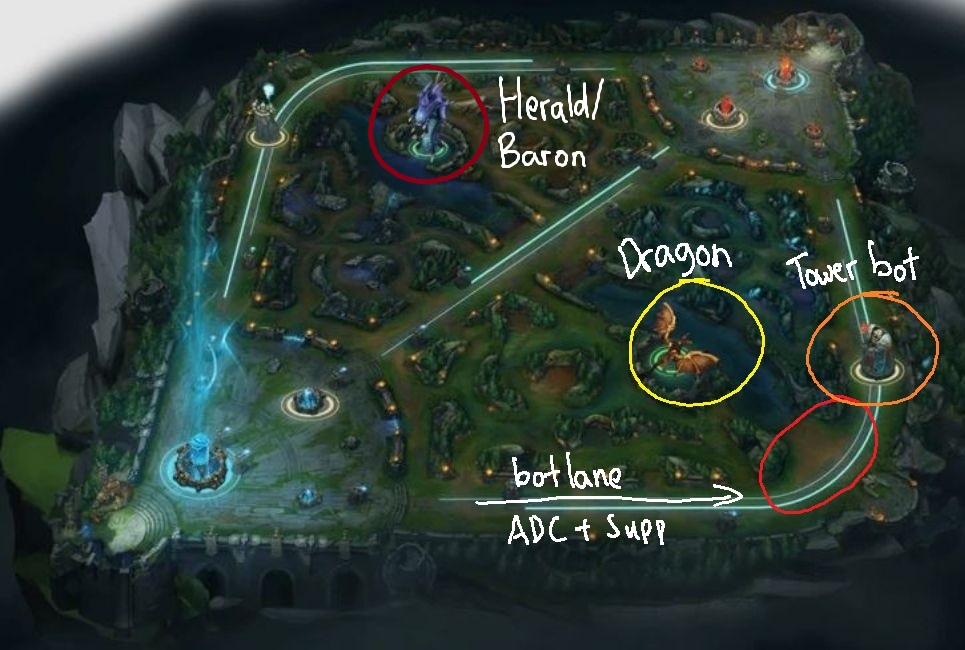

In [7]:
from IPython import display
display.Image('lol_map.jpg')

Secara umum, di early game ADC dan Support akan bermain di bot lane. <br>
Bisa dilihat dari layout map di atas bahwa objective yang paling relevan dengan ADC adalah dragon dan tower bot dibandingkan objective lain seperti herald/baron. <br>
First blood secara umum juga penting untuk ADC. Pemain yang mendapatkan first blood akan menerima bonus 200 Gold dan sebagai ADC yang relatif lemah di early game dan sangat bergantung pada item untuk menjadi relevan, bonus gold tersebut akan sangat berdampak pada performance ADC.

Jadi, tabel akan saya modifikasi sehingga memuat kolom-kolom berikut:
- game_id: identifier untuk game
- event1: event pertama yang terjadi dalam game
- event2: event kedua yang terjadi dalam game
- event3: event ketiga yang terjadi dalam game
- event4: event keempat yang terjadi dalam game
- event5: event kelima yang terjadi dalam game
- first_blood: Tim mana yang berhasil mendapatkan first_blood dalam 5 event pertama
- blue_dragon: berapa kali tim blue memenangkan dragon dalam 5 event pertama
- blue_tower_bot: berapa kali tim blue berhasil menghancurkan tower bot musuh dalam 5 event pertama
- blue_others: berapa kali tim blue berhasil memenangkan objective lainnya dalam 5 event pertama
- blue_adc_gp: berapa kali adc tim blue menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- blue_adc_wr: berapa win rate adc tim blue menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- blue_adc_kda: berapa rata-rata kda adc tim blue menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- red_dragon: berapa kali tim red memenangkan dragon dalam 5 event pertama
- red_tower_bot: berapa kali tim red berhasil menghancurkan tower bot musuh dalam 5 event pertama
- red_others: berapa kali tim blue berhasil memenangkan objective lainnya dalam 5 event pertama
- red_adc_gp: berapa kali adc tim red menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- red_adc_wr: berapa win rate adc tim red menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- red_adc_kda: berapa rata-rata kda adc tim red menggunakan champion yang dipilih dalam 6 bulan terakhir (game profesional)
- winner: tim mana yang menang

Untuk mendapatkan tabel dengan kolom-kolom di atas, saya perlu menyiapkan beberapa list yang berisi value dari kolom yang ingin saya tambahkan, antara lain: <br>
first_blood, blue_dragon, blue_tower, blue others, red_dragon, red_tower, red_others

In [8]:
# empty lists -> new columns to add
list_first_blood = []
list_dragon_blue = []
list_dragon_red = []
list_tower_bot_blue = []
list_tower_bot_red = []
list_others_blue = []
list_others_red = []

# column to take value from
first5events = ['event1', 'event2', 'event3', 'event4', 'event5']

# loop for each row
for i in range (len(df_base)):
    # initialize value for each column
    first_blood = 'no first blood'
    dragon_blue_count = 0
    dragon_red_count = 0
    tower_bot_blue_count = 0
    tower_bot_red_count = 0
    others_blue_count = 0
    others_red_count = 0

    # loop for each column in first 5 events
    for e in first5events:
        if df_base[e][i] == 'BLUE: first_blood':
            first_blood = 'BLUE'
        elif df_base[e][i] == 'RED: first_blood':
            first_blood = 'RED'
        elif df_base[e][i] == 'BLUE: dragon':
            dragon_blue_count += 1
        elif df_base[e][i] == 'RED: dragon':
            dragon_red_count += 1
        elif df_base[e][i] == 'BLUE: first_tower_bot' or df_base[e][i] == 'BLUE: second_tower_bot' or df_base[e][i] == 'BLUE: third_tower_bot' or df_base[e][i] == 'BLUE: inhibitor_bot':
            tower_bot_blue_count += 1
        elif df_base[e][i] == 'RED: first_tower_bot' or df_base[e][i] == 'RED: second_tower_bot' or df_base[e][i] == 'RED: third_tower_bot' or df_base[e][i] == 'RED: inhibitor_bot':
            tower_bot_red_count += 1
        else:
            if 'BLUE' in df_base[e][i]:
                others_blue_count += 1
            else:
                others_red_count += 1

    # append objective counts to lists
    list_first_blood.append(first_blood)
    list_dragon_blue.append(dragon_blue_count)
    list_dragon_red.append(dragon_red_count)
    list_tower_bot_blue.append(tower_bot_blue_count)
    list_tower_bot_red.append(tower_bot_red_count)
    list_others_blue.append(others_blue_count)
    list_others_red.append(others_red_count)

List berhasil dibuat. <br>
Supaya bisa ditambahkan ke tabel sebagai kolom, panjang list harus sama.

In [9]:
# check for missing values in row
if (len(list_first_blood) ==
    len(list_dragon_blue) ==
    len(list_dragon_red) ==
    len(list_tower_bot_blue) ==
    len(list_tower_bot_red) ==
    len(list_others_blue) ==
    len(list_others_red)):
    print('Jumlah row sama. Kolom sudah bisa ditambahkan ke tabel.')

Jumlah row sama. Kolom sudah bisa ditambahkan ke tabel.


#### Make a Copy

Sekarang list sudah bisa ditambahkan. Saya akan membuat copy sebelum melakukan modifikasi tabel.

In [10]:
# create a copy
df_mod = df_base.copy()
df_mod

,game_id,event1,event2,event3,event4,event5,blue_adc_gp,blue_adc_wr,blue_adc_kda,red_adc_gp,red_adc_wr,red_adc_kda,winner
0,36864,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: first_tower_top,0,0.00,0.00,0,0.00,0.00,BLUE
1,36865,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,RED: second_tower_top,1,1.00,0.67,10,0.40,4.07,RED
2,36866,RED: first_blood,BLUE: herald,RED: dragon,RED: first_tower_bot,BLUE: herald,2,0.50,2.80,0,0.00,0.00,RED
3,36867,RED: dragon,BLUE: first_blood,RED: herald,RED: dragon,RED: herald,2,0.50,1.50,5,0.60,9.12,RED
4,36868,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: herald,0,0.00,0.00,2,0.00,24.00,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,RED: first_blood,BLUE: dragon,BLUE: herald,RED: dragon,RED: first_tower_top,1,0.00,5.00,4,0.50,4.45,RED
5985,53243,RED: first_blood,RED: dragon,RED: herald,RED: dragon,RED: herald,8,0.38,6.31,5,0.20,4.50,RED
5986,53244,RED: dragon,BLUE: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,9,0.67,4.68,4,0.25,9.75,BLUE
5987,53245,RED: dragon,RED: herald,RED: dragon,BLUE: first_blood,RED: first_tower_bot,1,0.00,14.00,8,0.38,6.31,BLUE


#### Insert New Columns
Saya akan menambahkan kolom yang dari list yang sudah saya buat. Saya juga akan mengatur posisi kolom pada tabel supaya lebih mudah untuk dibaca.

In [11]:
df_mod.insert(9, 'red_others', list_others_red)
df_mod.insert(9, 'red_tower_bot', list_tower_bot_red)
df_mod.insert(9, 'red_dragon', list_dragon_red)
df_mod.insert(6, 'blue_others', list_others_blue)
df_mod.insert(6, 'blue_tower_bot', list_tower_bot_blue)
df_mod.insert(6, 'blue_dragon', list_dragon_blue)
df_mod.insert(6, 'first_blood', list_first_blood)

In [12]:
df_mod

,game_id,event1,event2,event3,event4,event5,first_blood,blue_dragon,blue_tower_bot,blue_others,blue_adc_gp,blue_adc_wr,blue_adc_kda,red_dragon,red_tower_bot,red_others,red_adc_gp,red_adc_wr,red_adc_kda,winner
0,36864,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: first_tower_top,RED,2,0,2,0,0.00,0.00,0,0,0,0,0.00,0.00,BLUE
1,36865,RED: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,RED: second_tower_top,RED,1,0,0,1,1.00,0.67,0,0,3,10,0.40,4.07,RED
2,36866,RED: first_blood,BLUE: herald,RED: dragon,RED: first_tower_bot,BLUE: herald,RED,0,0,2,2,0.50,2.80,1,1,0,0,0.00,0.00,RED
3,36867,RED: dragon,BLUE: first_blood,RED: herald,RED: dragon,RED: herald,BLUE,0,0,0,2,0.50,1.50,2,0,2,5,0.60,9.12,RED
4,36868,RED: first_blood,BLUE: dragon,BLUE: herald,BLUE: dragon,BLUE: herald,RED,2,0,2,0,0.00,0.00,0,0,0,2,0.00,24.00,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,RED: first_blood,BLUE: dragon,BLUE: herald,RED: dragon,RED: first_tower_top,RED,1,0,1,1,0.00,5.00,1,0,1,4,0.50,4.45,RED
5985,53243,RED: first_blood,RED: dragon,RED: herald,RED: dragon,RED: herald,RED,0,0,0,8,0.38,6.31,2,0,2,5,0.20,4.50,RED
5986,53244,RED: dragon,BLUE: first_blood,RED: herald,BLUE: dragon,RED: first_tower_top,BLUE,1,0,0,9,0.67,4.68,1,0,2,4,0.25,9.75,BLUE
5987,53245,RED: dragon,RED: herald,RED: dragon,BLUE: first_blood,RED: first_tower_bot,BLUE,0,0,0,1,0.00,14.00,2,1,1,8,0.38,6.31,BLUE


#### Modify Values in Event Columns
Karena informasi pada kolom event1 sampai event5 sudah bisa dilihat di kolom-kolom baru yang saya buat, saya akan memodifikasi values pada kolom event1-5 supaya hanya menampilkan informasi objectives yang relevan untuk ADC, yaitu first blood, dragon dan tower bot. Sisanya akan saya tampilkan sebagai others.

In [13]:
for e in first5events:
    df_mod[e] = df_mod[e].str.replace('RED: ', '')
    df_mod[e] = df_mod[e].str.replace('BLUE: ', '')
    df_mod[e] = df_mod[e].str.replace('first_tower', 'tower')
    df_mod[e] = df_mod[e].str.replace('second_', '')
    df_mod[e] = df_mod[e].str.replace('third_', '')

    for i in range(len(df_mod)):
        if df_mod[e][i] not in ['first_blood', 'dragon'] and '_bot' not in df_mod[e][i]:
            df_mod.loc[i, e] = 'other'

#### Show Modified Table (Final)

Tampilan akhir dari tabel yang akan dianalisa adalah seperti berikut

In [14]:
df_final = df_mod.copy()
df_final

,game_id,event1,event2,event3,event4,event5,first_blood,blue_dragon,blue_tower_bot,blue_others,blue_adc_gp,blue_adc_wr,blue_adc_kda,red_dragon,red_tower_bot,red_others,red_adc_gp,red_adc_wr,red_adc_kda,winner
0,36864,first_blood,dragon,other,dragon,other,RED,2,0,2,0,0.00,0.00,0,0,0,0,0.00,0.00,BLUE
1,36865,first_blood,other,dragon,other,other,RED,1,0,0,1,1.00,0.67,0,0,3,10,0.40,4.07,RED
2,36866,first_blood,other,dragon,tower_bot,other,RED,0,0,2,2,0.50,2.80,1,1,0,0,0.00,0.00,RED
3,36867,dragon,first_blood,other,dragon,other,BLUE,0,0,0,2,0.50,1.50,2,0,2,5,0.60,9.12,RED
4,36868,first_blood,dragon,other,dragon,other,RED,2,0,2,0,0.00,0.00,0,0,0,2,0.00,24.00,RED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,49142,first_blood,dragon,other,dragon,other,RED,1,0,1,1,0.00,5.00,1,0,1,4,0.50,4.45,RED
5985,53243,first_blood,dragon,other,dragon,other,RED,0,0,0,8,0.38,6.31,2,0,2,5,0.20,4.50,RED
5986,53244,dragon,first_blood,other,dragon,other,BLUE,1,0,0,9,0.67,4.68,1,0,2,4,0.25,9.75,BLUE
5987,53245,dragon,other,dragon,first_blood,tower_bot,BLUE,0,0,0,1,0.00,14.00,2,1,1,8,0.38,6.31,BLUE


#### Save final draft to .csv

In [15]:
df_final.to_csv('lol_for_adc.csv', index=False)

Data sudah disimpan. Lanjut ke Analisis.

## Data Analysis

Importing Libraries

In [42]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

### Difference Between Team
Mengingat layout map yang tidak simetris, apakah ada tim yang lebih mendapatkan keuntungan/advantage ? <br>
Untuk menjawab pertanyaan sederhana ini, saya akan membandingkan jumlah kemenangan tim BLUE dan RED dari 5989 game. <br>
Saya juga akan melakukan visualisasi data dengan menggunakan Bar Chart

[Text(0, 0, '3115'), Text(0, 0, '2874')]

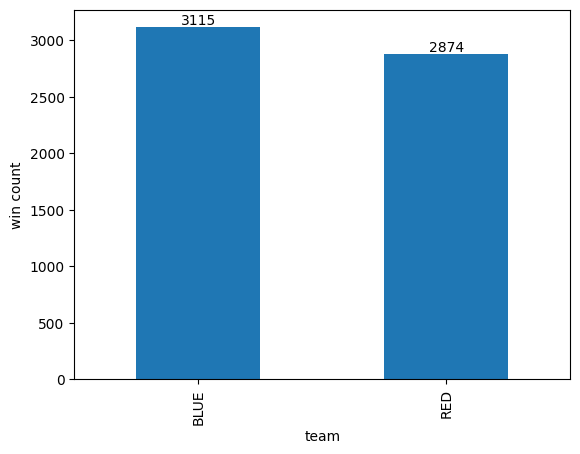

In [41]:
ax = df_final['winner'].value_counts().plot(kind='bar', xlabel='team', ylabel='win count')
ax.bar_label(ax.containers[0])

Terlihat bahwa tim BLUE lebih sering menang, dan perbedaannya cukup banyak (241 games)
#### \# Insight:
- Bisa diasumsikan bahwa bermain di tim BLUE memiliki advantage tersendiri
- Ada kemungkinan karena perbedaan layout map sehingga tim BLUE yang lebih dekat dengan dragon punya early game advantage

#### \# Tips:
Ketika bermain di tim BLUE, pastikan menang! Karena bermain di tim RED akan lebih sulit.

### Central Tendencies of Win Rate
Untuk mempersiapkan Matt menjadi pemain LoL profesional, penting untuk mengetahui seberapa ketat persaingan di dunia pro player. <br>
Karena itu saya akan menganalisa central tendencies dari win rate pemain ADC profesional berdasarkan data. <br>
Supaya penyebaran data lebih terlihat, saya juga akan menampilkan data dalam bentuk histrogram.

In [17]:
all_adc_wr = pd.concat([df_final['blue_adc_wr'], df_final['red_adc_wr']], ignore_index=True)
wr_mean = all_adc_wr.mean()
wr_median = all_adc_wr.median()
wr_modus = all_adc_wr.mode()[0]

print(f'Mean win rate pemain ADC profesional menggunakan champion yang dipilih adalah: {wr_mean}')
print(f'Median win rate pemain ADC profesional menggunakan champion yang dipilih adalah: {wr_median}')
print(f'Modus win rate pemain ADC profesional menggunakan champion yang dipilih adalah: {wr_modus}')

Mean win rate pemain ADC profesional menggunakan champion yang dipilih adalah: 0.37238353648355316
Median win rate pemain ADC profesional menggunakan champion yang dipilih adalah: 0.33
Modus win rate pemain ADC profesional menggunakan champion yang dipilih adalah: 0.0


<Axes: xlabel='win rate', ylabel='frequency'>

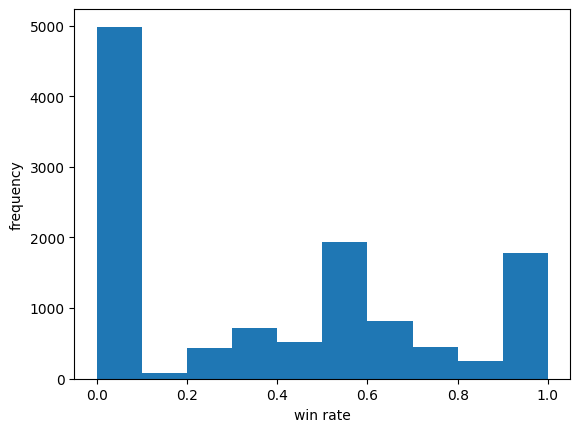

In [124]:
all_adc_wr.plot(kind='hist', xlabel='win rate', ylabel='frequency')

#### \# Insight
Berdasarkan hasil di atas, dapat diketahui bahwa:
- Mean yang lebih besar dari median menandakan skewness positif, artinya distribusi data condong ke kiri
- Bisa dibilang rata-rata win rate sekitar 33-37%, artinya pemain ADC profesional memenangkan 2 dari 5-6 game menggunakan champion pilihannya
- Modus 0 mengindikasikan ada banyak pemain ADC profesional yang memilih champion yang belum pernah dimainkan sebelumnya atau belum pernah menang ketika menggunakannya

### One-Trick-Pony ?
Di game League of Legend ada tipe pemain yang disebut 'One-Trick-Pony' atau disingkat OTP, yaitu pemain yang menggunakan champion yang sama terus menerus hingga menguasainya. <br>
Apakah trend seperti ini juga berlaku di kalangan pemain ADC profesional ? Sebagai tambahan, apakah kda juga terpengaruh kedua metrik tersebut ? <br>
Untuk menjawab pertanyaan ini, saya akan membandingkan jumlah game dengan win rate pemain ketika menggunakan champion yang dipilih dengan Scatter Plot. <br>
Saya juga akan menambahkan colormap sebagai indikator kda pemain. 

<Axes: xlabel='all_adc_gp', ylabel='all_adc_wr'>

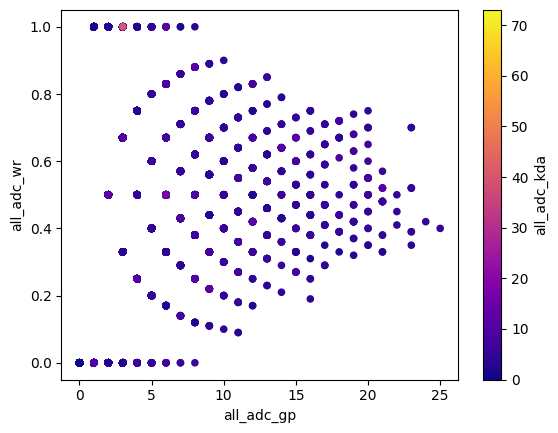

In [115]:
df_all_adc = pd.DataFrame({
    'all_adc_wr': all_adc_wr,
    'all_adc_gp':  pd.concat([df_final['blue_adc_gp'], df_final['red_adc_gp']], ignore_index=True),
    'all_adc_kda': pd.concat([df_final['blue_adc_kda'], df_final['red_adc_kda']], ignore_index=True)
})
df_all_adc.plot(kind='scatter', x='all_adc_gp', y='all_adc_wr', c='all_adc_kda', colormap='plasma')

Terlihat tidak ada hubungan yang linear antara gp dengan win rate, tapi terlihat ada pola mengerucut di mana semakin banyak game yang dimainkan menggunakan champion yang sama, win rate semakin ke tengah (50%). Kda tidak terlalu terpengaruh ataupun mempengaruhi gp atau win rate, bisa dilihat dari gradasi warna yang tidak ada polanya.
#### \# Insight:
- win rate ketika champion jarang digunakan tidak konsisten (bisa 0 bisa 100%)
- semakin sering bermain dengan champion yang sama, performance pemain akan semakin konsisten (25-55%)

#### \# Tips:
Sebaiknya tidak menggunakan champion yang terlalu bervariasi. Untuk bisa bermain dengan baik, perlu performance yang konsisten. <br>
Mengingat bahwa range rata-rata win rate pemain ADC profesional adalah 33-37%, jika dibandingkan di grafik, itu adalah performance setelah bermain 25+ game dngan champion yang sama.

In [132]:
# save to csv
df_all_adc.to_csv('all_adc.csv')

#### Minimal GP for Consistent >20% WR

In [117]:
# new dataframe showing minimal wr for each gp group
df_group_gp = df_all_adc[['all_adc_gp', 'all_adc_wr']].groupby('all_adc_gp').agg('min')
df_group_gp = df_group_gp.rename(columns={'all_adc_wr': 'wr', 'all_adc_gp': 'gp'}).rename_axis("gp", axis=0)

In [118]:
print('GP: 0-9')
print(df_group_gp[:10].transpose())
print("\n"+'GP: 10-19')
print(df_group_gp[10:20].transpose())
print("\n"+'GP: 20-25')
print(df_group_gp[20:].transpose())


GP: 0-9
gp    0    1    2    3    4    5    6    7    8     9
wr  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.11

GP: 10-19
gp   10    11    12    13    14    15    16    17    18    19
wr  0.1  0.09  0.17  0.23  0.21  0.27  0.19  0.29  0.33  0.32

GP: 20-25
gp    20    21    22    23    24   25
wr  0.35  0.33  0.41  0.35  0.42  0.4


#### \# Insight:
Pemain yang menggunakan champion yang sama sebanyak minimal 13 kali mulai mencapai win rate 20+% <br>
Dengan jam terbang minimal 17 game menggunakan champion yang sama, pemain memiliki win rate konsisten di atas 20%.

### Significance of Dragon and Bot Tower
Objective yang relevan untuk ADC adalah first blood, dragon dan tower bot seperti telah dijelaskan sebelumnya. <br>
Tapi seberapa signifikan persaingan mengalahkan dragon atau menghancurkan tower bot di 5 event pertama ? Dengan kata lain seberapa besar kontribusi ADC di early game ? <br>
Untuk menjawab pertanyaan ini saya akan menunjukkan visualisasi data menggunakan pie chart.

In [127]:
# combining all events columns into 1 long series
events_freq = pd.concat([
    df_final['event1'], 
    df_final['event2'], 
    df_final['event3'], 
    df_final['event4'], 
    df_final['event5']], ignore_index=True).value_counts()
events_freq

dragon         10585
other          10416
first_blood     5954
tower_bot       2990
Name: count, dtype: int64

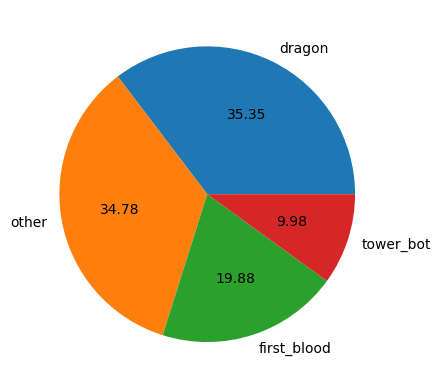

In [128]:
# plotting pie chart, show respective objective as labels and show percentage of each objective
plt.pie(events_freq, labels=events_freq.keys(), autopct='%.2f')
plt.show()

#### \# Insight:
Bisa dilihat bahwa dragon merupakan objective dengan prioritas tertinggi di early game sebesar 35.35%, sedangkan tower bot biarpun persentasenya (9.98%) tidak sebesar dragon tapi relatif besar mengingat others (34.78%) merupakan gabungan dari objectives lain seperti hancurnya tower mid/top dan herald/baron. <br>
ADC sebagai peran yang berkontribusi aktif dalam memenangkan dragon dan menghancurkan tower bot bisa dikatakan merupakan perang paling penting di early game karena terlibat dalam 45% persaingan objective.

In [131]:
# Save to csv
events_freq.to_csv('events_freq.csv')

### How Important is First Blood ?
First blood adalah objective yang hanya terjadi sekali dalam setiap game jadi sulit untuk bisa memastikan objective ini dimenangkan oleh ADC, bisa saja oleh role lain. <br>
Tapi first blood merupakan salah satu objective yang paling umum terjadi di dalam game, bahkan seringkali terjadi di early game yang menjadi fokus saya kali ini. <br>
Karena itu saya akan mencari tahu apakah ada hubungan antara tim yang mendapatkan first blood dengan tim yang menang.

Kedua data tersebut merupakan data categorical, karena itu saya akan melakukan pembuktian hipotesis dengan menggunakan Chi-Squared Test. <br>

<b>H0</b>: <u>Tidak ada</u> hubungan antara mendapatkan first blood dengan memenangkan game. <br>
<b>H1</b>: <u>Ada</u> hubungan antara mendapatkan first blood dengan memenangkan game.

In [46]:
df_final['first_blood'][(df_final['winner'] == 'BLUE')]

0        RED
6       BLUE
7        RED
11      BLUE
15      BLUE
        ... 
5976    BLUE
5978    BLUE
5983    BLUE
5986    BLUE
5987    BLUE
Name: first_blood, Length: 3115, dtype: object

In [47]:
#Contingency Table
contingency_table = pd.crosstab(df_final['first_blood'], df_final['winner'])
contingency_table

winner,BLUE,RED
first_blood,,
BLUE,1921,1086
RED,1167,1780
no first blood,27,8


In [48]:
res = st.chi2_contingency(contingency_table)
print("P-value:", res.pvalue)

P-value: 5.032727945171934e-79


P-value lebih kecil dari 0.05 (critical value), maka H0 ditolak dan H1 diterima. <br>
Ada hubungan antara mendapatkan first blood dengan memenangkan game

#### \# Insight:
- Tim yang mendapatkan first blood cenderung juga memenangkan game.
- Di game di mana tidak terjadi first blood di 5 event pertama tim BLUE punya tendensi menang lebih tinggi. (team advantage)

### Trends of Each Objective
Bagaimana dengan trend dari masing-masing objective ? Objective mana yang relevan atau menjadi prioritas di early game namun tidak sebegitu diperebutkan menjelang mid atau late game ? <br>
Untuk menjawab pertanyaan ini saya akan melakukan visualisasi data dengan menggunakan Line Chart.

In [23]:
events_trend = df_final[[
    'event1', 
    'event2', 
    'event3', 
    'event4', 
    'event5'
]].apply(pd.Series.value_counts)
events_trend = events_trend.transpose()
events_trend.drop(columns=['other'], inplace=True)
events_trend

,dragon,first_blood,tower_bot
event1,1167,4642,2
event2,3086,744,5
event3,1623,443,148
event4,3442,99,1050
event5,1267,26,1785


<Axes: xlabel='timeline', ylabel='objective count'>

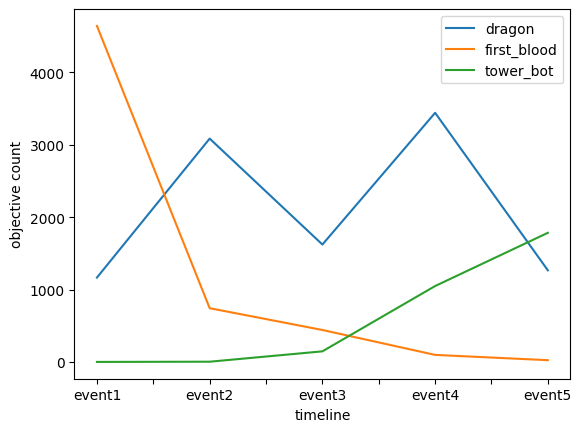

In [24]:
events_trend.plot(xlabel='timeline', ylabel='objective count')

#### \# Insight:
- first blood semakin tidak relevan seiring berlangsungnya game
- mulai event ketiga tower bot menjadi semakin relevan
- kompetisi untuk dragon secara umum selalu tinggi, tapi trendnya naik-turun. 
- Mengingat ada jeda waktu dragon respawn, bisa dibilang tendensi persaingan untuk memenangkan dragon di event genap lebih tinggi daripada event ganjil

#### \# Tips:
- bermain agresif di awal dan mendapatkan first blood
- setelah 1-2 event terjadi dalam game, mulai perlahan mengincar tower bot musuh
- jika ada kesempatan, memenangkan dragon merupakan prioritas tertinggi

In [130]:
# Save to csv
events_trend.to_csv('events_trend.csv')

## Conclusion

***
Untuk meningkatkan skill bermain LoL terutama sebagai ADC, hal-hal berikut perlu diperhatikan:
- Early game prioritaskan dragon setiap kali ada kesempatan.
- First blood berpengaruh terhadap hasil game, usahakan untuk mendapatkannya di awal-awal dan jangan berikan kepada lawan.
- Bermain di tim BLUE punya advantage tersendiri, manfaatkan kesempatan ketika bermain di tim BLUE.
- Jangan menggunakan terlalu banyak variasi champion, kuasai dahulu supaya performance bermain lebih konsisten.
***